In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import networkx as nx

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

# Display Graph
This section wil contain different display methods for the graphs.

In [7]:
def plot(graph):
    print("\nGENERATED GRAPH:")
    pos = nx.spring_layout(graph)
    nx.draw(graph,pos,edge_color='blue',width=1,linewidths=2,\
    labels={node:node for node in graph.nodes()})
    edge_labels=nx.draw_networkx_edge_labels(graph,pos, edge_labels= nx.get_edge_attributes(graph,'weight'))

In [8]:
def plot_seg(graph):
    print("\nGENERATED GRAPH:")
    pos = nx.spring_layout(graph)
    #nodes 
    nx.draw_networkx_nodes(graph,pos,nodelist=graph.nodelist,node_color='r')
    
    #edges
    nx.draw_networkx_edges(graph,pos,edgelist=graph.edgelist, edge_color='b')
    edge_labels=nx.draw_networkx_edge_labels(graph,pos, edge_labels= nx.get_edge_attributes(graph,'weight'))

# EDM
This section is used to define the Euclidian Distance Matrix (EDM). This currently has the EDM manually created in a numpy array but this will eventually become the EDM from the source code provided by the supporter of the project at the partner University.

In [50]:
def gen_EDM():
    inifnity = 99
    EDM = np.array([
        [inifnity,6,7,5,6,9],
        [6,inifnity,2,4,8,8],
        [7,2,inifnity,3,5,4],
        [5,4,3,inifnity,3,3],
        [6,8,5,3,inifnity,4],
        [9,8,4,3,4,inifnity],
    ])
    print("COMPOSED EDM:")
    print(EDM)
    return EDM

def gen_larger_EDM():
    infinity = 99
    EDM = np.array([
        [infinity,2,8,7,3,8,4,6,12,5],
        [2,infinity,6,7,10,4,9,3,5,2],
        [8,6,infinity,1,4,8,5,2,2,9],
        [7,7,1,infinity,7,8,1,9,3,2],
        [3,10,4,7,infinity,5,9,14,10,3],
        [8,4,8,8,5,infinity,4,3,6,9],
        [4,9,5,1,9,4,infinity,8,8,2],
        [6,3,2,9,14,3,8,infinity,4,7],
        [12,5,2,3,10,6,8,4,infinity,5],
        [5,2,9,2,3,9,2,7,5,infinity]
    ])
    print("COMPOSED EDM:")
    print(EDM)
    return EDM

def generate_random_edm(shape,infinity_value,max_value, min_value):
    init_matrix = np.random.random_integers(min_value,max_value,size=shape)
    symmetrical_matrix = (init_matrix + init_matrix.T)/2
    np.fill_diagonal(symmetrical_matrix,infinity_value)
    print("COMPOSED EDM:")
    print(symmetrical_matrix)
    return symmetrical_matrix

# Graph Generation
This section will be used to generate and display the graph. This is using the few API calls that are defined in the other sections of this file.

## Add Cluster to Graph
This function will take a graph and add a cluster to this graph. Parameters for the colours of the nodes and edges can be specified. 

In [10]:
def add_cluster_to_graph(graph, cluster, edge_colour, node_colour):
    #add weighted edge to graph with cluster colour    
    for i in len(cluster):
        graph.add_weighted_edges_from(cluster[i],edge_colour=edge_colour,node_colour=node_colour) #set edge colour
    return graph

In [46]:
def gen_graph(edm):
    G = nx.Graph()
    for i in range(edm.shape[0]):
        for j in range(edm.shape[1]):
            G.add_weighted_edges_from([(i,j,edm[i][j])])
    return G

In [12]:
def gen_graph_nodes(nodes):
    G = nx.Graph()
    for node in range(nodes):
        G.add_node(node)    
    return G

In [1]:
#EDM = gen_larger_EDM()
#graph = gen_graph(EDM)
#plot(graph)

# Graph Navigation

In [ ]:
def is_path(graph, source, dest):
    return nx.has_path(graph, source, dest)

In [ ]:
def shortest_path(graph, source, dest):
    return nx.astar_path_length(graph, source, dest)

In [ ]:
def generate_cluster(graph, source, hops):
    cluster = graph.single_source_shortest_path_length(graph, source, [hops])
    return cluster

# Clustering Techniques
The code below here is to detect the clusters in the graphs. This is done through differnt methods and some explore the problem in more detail than others.

The following two statements are true for all of the techniques outlined here.

- Clustering will continue until all nodes are included in at least one cluster. 

- The technique makes use of the EDM to determin which nodes are included in the cluster with proximity as the metric.

- The clusters will be marked with colours. The nodes that exist in more than one of the clusters they will be marked as grey. These will be annotated with the number of clusters that they reside in

- The data returned from all functions are the clusters and the graph.


### Pair Clustering
This techniques creates a cluster between the two nearest nodes at all steps.

In [ ]:
def pair_clustering(edm):
    
    #set an initial colour for the edges (needs implementing)
    #colour = 'red'
    #generate graph from EDM (no edges)
    graph = gen_graph(edm)   
    #empty set of clusters
    clusters = []
    #get EDM "infinite state" (largest value)
    infinity = edm.argmax()   
    #for loop
    for i in range(len(edm.flatten())) :
        #get smallest value from EDM
        value = edm.flatten()[np.argmin(edm)]
        #check that the value is smaller than the inifnite state value (has real Euclidian Distance to node)       
        if value >= infinity :
            #this means that there are no more nodes to be checked
            break
        
        #find the index of the value    
        (j, k) = np.unravel_index(np.argmin(edm),b.shape)    
        #create the pair cluster
        clusters.append([j,[k,value]])
              
        #set the value of the completed edge to infinity
        #stops repeated checks on this value
        edm[j][k] = infinity
        
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
        
    return graph, clusters
    

### N Clustering
This technique will create clsuters of nodes where the number of nodes in each cluster is selected as the paramter N. The number of clusters is variable. 



In [ ]:
#used to cluster with a fixed number of nodes per cluster
def N_Clustering(edm, N):
    #generate EDM from graph
    graph = gen_graph(edm)
    #Stores the generated clusters with nodes in 2D list
    #format [source,[dest,weight],[dest,weight],...]
    clusters = []    
    #get EDM max value
    infinity = edm.argmax()
    #edm dimension 
    size = edm.shape[0]
    #iterate the EDM
    for node in size:
        pairs = 0
        local_cluster = []        
        #add the node to the current cluster
        local_cluster.append(node)
        while pairs < N :
            #find argmin of this nodes array
            min_pair = np.argmin(edm[node])
            #check if the node is the one that is currently being checked
            if min_pair == node:
                continue
            #if not
            #get weight of the edge between
            value = edm.flatten()[np.argmin(edm)]
            #get min node indecies
            (j, k) = np.unravel_index(np.argmin(edm),b.shape)
            #set distance to infinity to stop checking same node
            edm[j,k] = infinity
            #add the new nearest node to the list.
            local_cluster.append([min_pair,value])
            
            #on successful pairing
            pairs += 1
        #add the cluster to the list of clusters
        clusters.append(local_cluster)
        #reset value for next node
        pairs = 0 
        
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
        
    return graph, clusters

#used to cluster with a random number of nodes per cluster
def N_Clustering_Random(edm):
    import random
    #generate new random int within 0 and EDM width
    N = randint(0,edm.shape[0])
    #run N_Clustering on random N
    graph, clusters = N_Clustering(edm,N)
    
    return graph, clusters

### P Clustering
This technique will create clsuters of nodes. The number of clusters is selected as the paramter cluster_nodes. cluster_nodes sets the initial nodes to start the clusters.

In [1]:
#set nodes can be selected to initialize the clusters
#ths is useful for exploring the same resulting cluster graph
def P_Clustering(edm, cluster_nodes, min_overlaps):
    #generate graph from EDM
    graph = gen_graph(edm)
    #empty set of clusters
    clusters = []
    #get max value in EDM
    infinity = edm.argmax() 
    value =0
    #iterate the selected clusters
    for i in len(cluster_nodes):  
        local_cluster = []
        for j in min_overlaps:
            #get the current itterations node
            node = cluster_nodes[i]
            #find clsotest node to initial node cluster
            (j, k) = np.unravel_index(np.argmin(edm),b.shape
            #get the edge value
            value = edm.flatten()[np.argmin(edm)]
            #add the new nearest node to the current cluster
            local_cluster = [i,[j,vlaue]]  
            #set the value selected from the EDM to "infinity"
            edm[j,k] = infinity
                
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
    
    return graph, clusters


#randmoise the nodes that are selected to form the initial node set
#this is useful when looking to explore the space and find a more optimal setup
def P_Clustering_Random(edm,number_of_clusters,min_overlaps):
    import random
    
    #generate "node_of_clusters" node points
    node_clusters = []
    
    for i in number_of_clusters:
        #generate new number from 0 to max index of the EDM
        node = randint(0,edm.shape[0])
        #check if the node is in the current set of selected nodes
        if node not in node_clusters:
            #add the node if it isn't in the generated set
            node_clusters.append(node)
        else
            #decriment the current itteration to all for 
            #another node to be generated at random
            i-=1
    
    #call P-Clustering
    graph, clusters = P_clustering(edm, cluster_nodes, min_overlap)
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
    return graph, clusters

SyntaxError: invalid syntax (<ipython-input-1-93e5c23c6883>, line 20)

### Hierachical
This tecnique will create clusters of nodes. The clusters will be determied by the node pairs that reside closest to one another. If nodes already exist in a cluster then the new adjacent node is added to that cluster. 



In [ ]:
#depth - this value sets the number of clusters that are created
#this the follows pair clustering
def Hierachical_Clustering(edm, depth):
    graph = gen_graph(edm)
    
    
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
    return graph, clusters

### Hierachical Entropy Clustering
This techniques makes use of the hierachical clustering method. The developed hieirachies are then analysed for nodes that are overlapping between the values on 1 < x <= N, where N is the total number of clusters in the network. The lower bound of the function to define the limits of x is not yet defined and currently any more than 1 overlap will be considered.

The nodes that have overlapping clusters will be assigned a value of "Entropy" according to their nubmer of overlaps. The lower the value of the "Entropy" of a node the less risk this has associated.

In [ ]:
def Hierachical_Entropy_Clustering(edm, depht,n_size):
    graph = gen_graph(edm)
    
    #clusters need to be allocated a colour for the edges and nodes    
    #graph = add_cluster_to_graph(graph,clusters,edge_colour,node_colour)
    return graph, clusters

# Empty Graph Plot

In [ ]:
#edm = gen_larger_EDM()
#graph = gen_graph_nodes(edm.shape[0])
#plot(graph)

# EDM plotted

In [ ]:
#plot(gen_graph(edm))

## Cyclic Clustering With Entropy Analysis

In [4]:
def Cyclic_Clustering_With_Entropy_Analysis(edm, min_clustering, cluster_size):

    cluster_count = [0]*edm.shape[0]
    clusters = []
    graph = nx.Graph()

    for i in range(edm.shape[0]*3):
        j, k = np.unravel_index(np.argmin(edm),edm.shape)
        #get the edge value
        value = edm.flatten()[np.argmin(edm)]   
        if value == 99:
            break
        graph.add_weighted_edges_from([(j,k,value)])
 
        edm[j][k] = 99    
        edm[k][j] = 99
        
        cluster_count[j]+=1
        cluster_count[k]+=1
        
        if np.amin(cluster_count) == min_clustering:
            break

    graph, clusters = generate_clusters(graph, cluster_size)
    entropy_mask = Get_Graph_Entropy(cluster_count)

    return graph, clusters, entropy_mask

# Node Entropy
This is a table showing the nodes degree in the network.

This shows that nodes with a high degree have high entropy in the graph

Reasoning to use this is that the higher the degree the more influance the node has on the network. Which shows its importance.

In [ ]:
def Get_Graph_Entropy(cluster_counts):
    ordered_entropy = []
    for i in range(len(cluster_counts)):
        ordered_entropy.append((i,cluster_counts[i]))
        
    return ordered_entropy

This is a table showing the inverse node degree

This shows that nodes with a high degree have low entropy in the graph.

Reasoning to use this is that the higher the degree the more anchored the node is in the network. This means that this nodes is likely to be a key node in locating other nodes incident to itself and surrounding clusters.

In [ ]:
def Get_Graph_Inverse_Entropy(cluster_counts):
    ordered_entropy = []
    max_ent = np.amax(cluster_counts)
    for i in range(len(cluster_counts)):
        ordered_entropy.append((i,max_ent - cluster_counts[i]))
        
    return ordered_entropy

# Generate Clusters
Clusters are generated from cycles in the graph. The size of the cycles (hops) is determined by the desired size of each cluster. The size of the cluster is set as a parameter by the user. The size is a set size.

- Shortest path will determin the path between nodes. 
- Nodes that don't exist in the set size clusters will be sub clustered in non-overlapping clusters

This step involves :

1) Find cycles between nodes

2) Check that the cycles size matches the cluster size

3) If there is a node not in a cluster then complete

In [ ]:
def generate_clusters(undirected_graph, cluster_size):
    min_cluster_size_cycles = []
    
    #convert the grapg to a directed graph
    directed_graph = undirected_graph.to_directed()
    #anaylyse all cycles O(n^2)
    cycles = list(nx.simple_cycles(directed_graph))

    #iterate over all cycles found
    for i in range(len(cycles)):
        #only use the cycles that have correct hop count
        if len(cycles[i]) == cluster_size:
            #set intial plurality state to False
            plurality = False
            #generate the pluraility matrix against current cycle
            plurality_matrix = np.isin(min_cluster_size_cycles,cycles[i])
            #iterate the matrix to find plurals of cycle
            for j in range(len(plurality_matrix)):
                #if this is true then there is a plural of a cycle
                if plurality_matrix[j].all():                    
                    plurality = True
                    #can stop checking here for more plurals
                    #break
            if not plurality:
                #add the unqiue array to the list
                min_cluster_size_cycles.append(cycles[i])

    print("The clusters formed that are of size {}:".format(cluster_size))
    
    print("Nodes that have no cluster:")
    #flattens the array to get all unqiue values
    uniquie_nodes = np.unique(min_cluster_size_cycles)
    
    #iterate nodes in the graph that dont have affiliation with a cluster
    for i in range(len(directed_graph.nodes)):
        if i not in uniquie_nodes :
            print("\tNode {}:".format(i))
            #get adjacent nodes to form pair cluster
            nodes = [n for n in directed_graph.neighbors(i)]
            for j in range(len(nodes)):
                print("\t\tCluster formed [{},{}].".format(i,nodes[j]))
                #add new cluster to the collection of min clusters
                min_cluster_size_cycles.append([i,nodes[j]])  
            
    return directed_graph, min_cluster_size_cycles

In [ ]:
#edm = gen_larger_EDM()
#The clustering technique applied to get the initial clusters is incosiquential to the final result. 
#Importantly the entropy matrix is generated for the next stage of clustering
#gph, cls, ent = Cyclic_Clustering_With_Entropy_Analysis(edm, min_clustering=1, cluster_size=3)
#print("Cyclic Clusters formed for this network: ")
#print(cls)
#print("Entropy Matrix:")
#print(ent)
#plot(gph)

Now that the graph has been anaysed for entropy given the clustering parameters. The graph can be re-clustered according to nodes with low entropy. The lower the entropy of a node the more stable the node is. The stability of a node effects its ability to support different cluster sizes. The cluster will be formed around a node by "attracting" other nearby nodes. 

Attracting referes to the reach of a node. The reach of a node is it's entropy value, which is initially halved. This value is then incirmented at the discretion of the algorithm. 0.5 and 1 are good start values for small distances. Selection of this value will be discrtionary. 



In [ ]:
def Entropy_Clustering(entropy_matrix,graph,clusters):
    #initialize the array values to 0s
    entropy_values = np.array([0]*len(entropy_matrix))
    #copy array values
    for i in range(len(ent)):
        entropy_values[i] = entropy_matrix[i][1]

    #initialize the entropy values to 50% original value
    E = entropy_values / 2  
    #print(E)
    graph_sets = []
    #get the max edge weight in the graph
    max_edge_length = sorted(graph.edges.data('weight'), 
                      key=lambda x:x[2])[len(graph.edges)-1][2]


    current_edge_length = 0
    #get all edges in the graph
    edges = list(graph.edges.data('weight'))
    iteration = 0
    #loop while the max entropy of the nodes is less than then entropy
    #threashold of the graph (max edge weight)
    while current_edge_length <= max_edge_length:

        iteration_set = []

        #iterate over all nodes radii
        for node in range(len(E)):
            node_edge_set = []

            #iterate over all the edges
            for edge in range(len(edges)):
                #check that that edge srouce is the current node
                #check that the edge weight is <= current nodes radius
                if (edges[edge][0] == node) and edges[edge][2] <= E[node]:                
                    #create the new edge
                    new_edge = [edges[edge][0],edges[edge][1],edges[edge][2]]
                    node_edge_set.append(new_edge)
                    #print("\t"+str(new_edge))
            #add the nodes edges to the iteratation set
            iteration_set.append(node_edge_set)
            iteration += 1
        iteration = 0
        #add the iteration set to the line in table for this iteration
        graph_sets.append(iteration_set)
        #increment the entropy values by 0.5
        E = (((E*2)+1)/2)
        #print(E)
        #update the current min entropy value
        current_edge_length = np.amin(E)
    for i in range(len(graph_sets)):    
        print("Iteration: {}".format(i))
        print(graph_sets[i])

    return graph_sets


In [ ]:
#from here the clusters can be generate by looking at the size of the cluster
#checks need to be added for non-intersection clusters
#if clusters dont intersect over the entire graph then these can
#be considered as seperate network and this isnt the case
#this can happen when the cluster size is too small

def compute_final_clusters(cluster_size, clusters):
    #iterates the node cluster sets and find the cluster size required
    final_clusters = []
    all_clusters = []
    for row in range(len(clusters)):
        #print("Row {}".format(row))
        for node in range(len(clusters[0])):
            #print("\tNode {}".format(node))
            current_cluster_set = clusters[row][node] 
            all_clusters.append(current_cluster_set)
            if len(current_cluster_set) == cluster_size - 1:
                #print("Has correct numbr of clustered nodes")
                #print (current_cluster_set)

                if current_cluster_set not in final_clusters:
                    final_clusters.append(current_cluster_set)
    #print()
    print("Clusters")
    for i in final_clusters:
        print(i)
    return final_clusters, all_clusters

In [ ]:
#for cluster in range(len(final_clusters)):
#    print("Attractor Node: {}".format(final_clusters[cluster][0][0]))
#    for pair in range(len(final_clusters[cluster])):
#        print("\tNode {}".format(final_clusters[cluster][pair][1]))

In [ ]:
#Check for intersection between all clusters
#Notify as to the cluster that doesnt have an intersection

def check_intersection_instances(edm,clusters,instances):
    non_intersecting_node = []
    print("No multi-intersections at nodes:")
    for i in range(edm.shape[0]):
        intersections = 0
        for cluster in range(len(clusters)):
            intersections += len(np.intersect1d([i],[clusters[cluster]]))
            #if len(np.intersect1d([i],[clusters[cluster]])) > 0:
            #    intersections +=1
        if intersections < instances:
            non_intersecting_node.append(i)
            #print(i)
    return non_intersecting_node

In [ ]:
#check that all nodes are covered by the selection
def check_coverage(edm,clusters):
    from functools import reduce
    print("No intersections found for nodes:")
    values = []
    for i in range(edm.shape[0]):
        if len(reduce(np.intersect1d, [i],clusters)) == 0:
            print(i)
            values.append(i)
    return values

In [ ]:
#check_coverage(edm,final_clusters)

In [ ]:
#find a cluster that is appropriate
#user must indicate a larger or smaller cluster to be selected 
#or the cluster can leave blank and have a random cluster selected
#if no clusters are avaliable then the user should reconfigure the network parameters

def test_coverage(edm,clusters):
    missing_nodes = check_coverage(edm,clusters)
    print("Avaliable clusters to choose from:")
    avaliable_choices = []
    for cluster in range(len(all_clusters)):
        if len(np.intersect1d(missing_nodes,all_clusters[cluster])):
            if all_clusters[cluster] not in avaliable_choices:
                avaliable_choices.append(all_clusters[cluster])
    print(avaliable_choices)
    return avaliable_choices        

In [ ]:
#test_coverage(edm,final_clusters)

# End-To-End Execution

In [493]:
#Settings
#init_cluster_size = 3
#entropy_cluster_size = 4
#min_node_membership = 2
#intersection_instance_min = 2

COMPOSED EDM:
[[99  2  8  7  3  8  4  6 12  5]
 [ 2 99  6  7 10  4  9  3  5  2]
 [ 8  6 99  1  4  8  5  2  2  9]
 [ 7  7  1 99  7  8  1  9  3  2]
 [ 3 10  4  7 99  5  9 14 10  3]
 [ 8  4  8  8  5 99  4  3  6  9]
 [ 4  9  5  1  9  4 99  8  8  2]
 [ 6  3  2  9 14  3  8 99  4  7]
 [12  5  2  3 10  6  8  4 99  5]
 [ 5  2  9  2  3  9  2  7  5 99]]

GENERATED GRAPH:


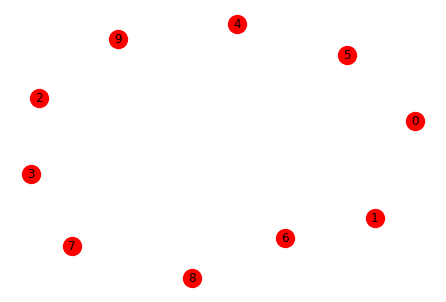

In [14]:
#edm = gen_larger_EDM()
#graph = gen_graph_nodes(edm.shape[0])
#plot(graph)


GENERATED GRAPH:


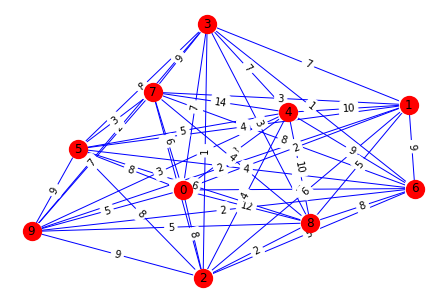

In [15]:
#plot(gen_graph(edm))

In [521]:
#graph, clusters, entropy_matrix = Cyclic_Clustering_With_Entropy_Analysis(edm, min_node_membership, init_cluster_size)

The clusters formed that are of size 3:
Nodes that have no cluster:
	Node 6:
		Cluster formed [6,16].
		Cluster formed [6,5].
		Cluster formed [6,2].
		Cluster formed [6,0].
	Node 15:
		Cluster formed [15,7].
		Cluster formed [15,8].
		Cluster formed [15,12].


In [522]:
#cluster_sets = Entropy_Clustering(entropy_matrix,graph,clusters)

Iteration: 0
[[], [[1, 5, 3.0]], [], [[3, 10, 4.5]], [], [[5, 1, 3.0]], [], [], [], [], [], [], [], [], [], [], [], []]
Iteration: 1
[[], [[1, 5, 3.0]], [], [[3, 10, 4.5], [3, 9, 5.0]], [], [[5, 1, 3.0]], [], [], [], [], [], [], [], [], [], [], [], []]
Iteration: 2
[[], [[1, 5, 3.0], [1, 13, 4.5]], [], [[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5]], [], [[5, 1, 3.0]], [], [], [], [], [], [], [], [], [], [], [], []]
Iteration: 3
[[[0, 11, 4.5]], [[1, 5, 3.0], [1, 13, 4.5]], [[2, 13, 4.0]], [[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5]], [], [[5, 1, 3.0]], [], [], [], [], [], [], [], [], [], [], [], []]
Iteration: 4
[[[0, 11, 4.5]], [[1, 5, 3.0], [1, 13, 4.5]], [[2, 13, 4.0]], [[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5], [3, 5, 6.5]], [], [[5, 1, 3.0]], [], [[7, 15, 5.0]], [], [], [], [], [], [], [], [], [], []]
Iteration: 5
[[[0, 11, 4.5]], [[1, 5, 3.0], [1, 13, 4.5]], [[2, 13, 4.0]], [[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5], [3, 5, 6.5]], [], [[5, 1, 3.0]], [], [[7, 15, 5.0], [7, 3, 5.5]], [], [], [], 


GENERATED GRAPH:


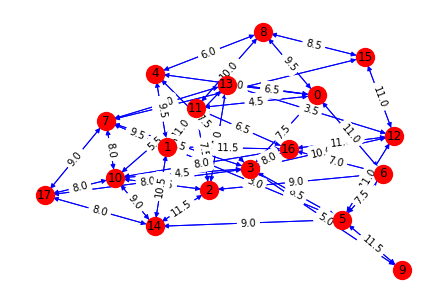

In [523]:
#plot(graph)

In [537]:
#final_clusters, all_clusters = compute_final_clusters(entropy_cluster_size,cluster_sets)

Clusters
[[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5]]
[[0, 11, 4.5], [0, 13, 6.5], [0, 4, 7.0]]
[[5, 1, 3.0], [5, 3, 6.5], [5, 6, 7.5]]
[[13, 12, 3.5], [13, 2, 4.0], [13, 1, 4.5]]
[[7, 15, 5.0], [7, 3, 5.5], [7, 10, 8.0]]
[[4, 8, 6.0], [4, 0, 7.0], [4, 3, 7.5]]
[[2, 13, 4.0], [2, 11, 7.5], [2, 6, 9.0]]
[[11, 0, 4.5], [11, 10, 5.5], [11, 16, 6.5]]
[[6, 16, 7.0], [6, 5, 7.5], [6, 2, 9.0]]
[[8, 4, 6.0], [8, 15, 8.5], [8, 0, 9.5]]
[[17, 3, 8.0], [17, 10, 8.0], [17, 14, 8.0]]
[[14, 17, 8.0], [14, 5, 9.0], [14, 10, 9.0]]
[[15, 7, 5.0], [15, 8, 8.5], [15, 12, 11.0]]


In [538]:
#check_intersection_instances(edm,final_clusters,intersection_instance_min)

No multi-intersections at nodes:


[]

In [539]:
#suggested_clusters = test_coverage(edm,final_clusters)

No intersections found for nodes:
Avaliable clusters to choose from:
[]


In [527]:
#if len(suggested_clusters) > 0 :
    
#    final_clusters.append(suggested_clusters)

In [528]:
#final_clusters

[[[3, 10, 4.5], [3, 9, 5.0], [3, 7, 5.5]],
 [[0, 11, 4.5], [0, 13, 6.5], [0, 4, 7.0]],
 [[5, 1, 3.0], [5, 3, 6.5], [5, 6, 7.5]],
 [[13, 12, 3.5], [13, 2, 4.0], [13, 1, 4.5]],
 [[7, 15, 5.0], [7, 3, 5.5], [7, 10, 8.0]],
 [[4, 8, 6.0], [4, 0, 7.0], [4, 3, 7.5]],
 [[2, 13, 4.0], [2, 11, 7.5], [2, 6, 9.0]],
 [[11, 0, 4.5], [11, 10, 5.5], [11, 16, 6.5]],
 [[6, 16, 7.0], [6, 5, 7.5], [6, 2, 9.0]],
 [[8, 4, 6.0], [8, 15, 8.5], [8, 0, 9.5]],
 [[17, 3, 8.0], [17, 10, 8.0], [17, 14, 8.0]],
 [[14, 17, 8.0], [14, 5, 9.0], [14, 10, 9.0]],
 [[15, 7, 5.0], [15, 8, 8.5], [15, 12, 11.0]]]

In [503]:
#all_clusters

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0]],
 [],
 [[6, 1, 5.0], [6, 4, 5.0], [6, 5, 8.0]],
 [],
 [],
 [],
 [],
 [[1, 6, 5.0]],
 [],
 [],
 [[4, 6, 5.0], [4, 8, 8.0]],
 [],
 [[6, 1, 5.0], [6, 4, 


GENERATED GRAPH:


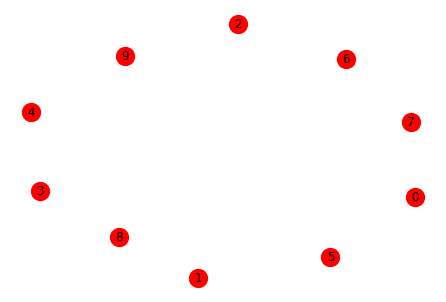

In [51]:
#edm = generate_random_edm((20,20),99,20,1)
#graph=gen_graph(edm)

COMPOSED EDM:
[[99.  11.5 12.   5.5  9.5 18.5  8.5  9.   2.5 15.  14.  15.5 16.  15.5
  13.   8.  17.5  9.  10.5 14. ]
 [11.5 99.   8.  15.   9.5  8.5  9.5 14.  12.5  9.  12.5 11.  11.   6.5
  10.   6.5  5.  12.  10.   2. ]
 [12.   8.  99.   4.5  9.  11.   7.5  9.  11.   5.   7.  11.5 10.5 16.5
  12.5  6.  10.  14.5  8.  10.5]
 [ 5.5 15.   4.5 99.   8.5 16.   5.5 14.5 11.  10.  10.  11.5 16.5  5.5
  10.5 12.  15.  17.  14.5  7.5]
 [ 9.5  9.5  9.   8.5 99.   9.   9.  17.  14.  12.5 10.5 12.   4.   2.
  13.  14.  14.   3.  10.  11. ]
 [18.5  8.5 11.  16.   9.  99.  11.5 11.  10.5  9.  10.   8.  12.   9.5
  10.  10.5 13.   5.5  6.  15.5]
 [ 8.5  9.5  7.5  5.5  9.  11.5 99.   7.5  9.   5.5  5.5 10.5  7.5  7.
  11.5 10.5 11.  14.   4.   5.5]
 [ 9.  14.   9.  14.5 17.  11.   7.5 99.  14.   7.  10.5  8.5  7.  15.5
   8.   8.   8.  10.5 12.5 14.5]
 [ 2.5 12.5 11.  11.  14.  10.5  9.  14.  99.  11.5 15.5 10.  17.5  6.
   7.  10.5 16.5  8.5  8.5 14. ]
 [15.   9.   5.  10.  12.5  9.   5.5  7.  11

In [52]:
#graph2 = nx.minimum_spanning_tree(graph)


GENERATED GRAPH:


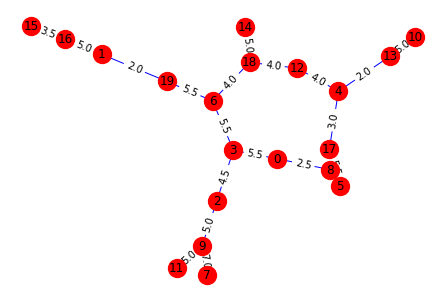

In [53]:
#plot(graph2)